# Alzheimer MRI

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
import os
import cv2

In [3]:
x,y=[],[]
path=r"D:\Singularis DL\dl\Alzheimer MRI\train"
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path, i)):
        image_path = os.path.join(path, i, j)
        array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        array_resize = cv2.resize(array, (100, 100))
        array_reshape = array_resize.reshape(100, 100, 1)
        array_norm = array_reshape / 255
        x.append(array_norm)
        y.append(i)

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(10240, 100, 100, 1)
(10240,)


In [4]:
y

array(['Mild Impairment', 'Mild Impairment', 'Mild Impairment', ...,
       'Very Mild Impairment', 'Very Mild Impairment',
       'Very Mild Impairment'], dtype='<U20')

In [5]:
le=LabelEncoder()

In [6]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [7]:
y.shape

(10240,)

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [9]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

8192 8192
2048 2048


In [10]:
ytest

array([1, 0, 3, ..., 3, 3, 1], dtype=int64)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPool2D(2, 2)) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))  
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,028 (16.61 MB)

 Trainable params: 4,353,028 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(xtrain,ytrain,batch_size=32,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 54s 199ms/step - accuracy: 0.5198 - loss: 1.0578 - val_accuracy: 0.8418 - val_loss: 0.3693
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 50s 196ms/step - accuracy: 0.8670 - loss: 0.3260 - val_accuracy: 0.8452 - val_loss: 0.3227
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 56s 220ms/step - accuracy: 0.9308 - loss: 0.1828 - val_accuracy: 0.9175 - val_loss: 0.2096
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 58s 227ms/step - accuracy: 0.9691 - loss: 0.0929 - val_accuracy: 0.9614 - val_loss: 0.1150
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 59s 229ms/step - accuracy: 0.9918 - loss: 0.0384 - val_accuracy: 0.9634 - val_loss: 0.0992
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 58s 227ms/step - accuracy: 0.9958 - loss: 0.0190 - val_accuracy: 0.9263 - val_loss: 0.2283
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 58s 226ms/step - accuracy: 0.9906 - loss: 0.0332 - val_accuracy: 0.9731 - val_loss: 0.0851
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 59s 229ms/step - accuracy: 0.9987 - loss: 0

In [72]:
test_path = r"D:\Singularis DL\dl\Alzheimer MRI\test\No Impairment\1 (35).jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']

if l[a] == 'No impairment':
    print(f"Prediction: Healthy ({l[a]})")
else:
    print(f"Prediction: Alzheimer ({l[a]})")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: Healthy (No impairment)


In [80]:
test_path = r"D:\Singularis DL\dl\Alzheimer MRI\test\Mild Impairment\6 (28).jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']

if l[a] == 'No impairment':
    print(f"Prediction: Healthy ({l[a]})")
else:
    print(f"Prediction: Alzheimer ({l[a]})")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: Alzheimer (Mild impairment)


In [76]:
test_path = r"D:\Singularis DL\dl\Alzheimer MRI\test\Very Mild Impairment\2 (54).jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']

if l[a] == 'No impairment':
    print(f"Prediction: Healthy ({l[a]})")
else:
    print(f"Prediction: Alzheimer ({l[a]})")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Alzheimer (Very mild impairment)


In [78]:
test_path = r"D:\Singularis DL\dl\Alzheimer MRI\test\Moderate Impairment\19.jpg"
array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
array_resize = cv2.resize(array, (100, 100))
array_reshape = array_resize.reshape(1, 100, 100, 1)
array_norm = array_reshape / 255
print(array_norm.shape)

a = model.predict(array_norm)
a = np.argmax(a)

l = [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment']

if l[a] == 'No impairment':
    print(f"Prediction: Healthy ({l[a]})")
else:
    print(f"Prediction: Alzheimer ({l[a]})")

(1, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Alzheimer (Moderate impairment)


In [19]:
print(model.input_shape)

(None, 100, 100, 1)


In [20]:
ypred = model.predict(xtest)
ypred

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step


array([[1.5389091e-12, 1.0000000e+00, 1.4087841e-09, 3.0020730e-10],
       [9.9999976e-01, 2.6716657e-11, 2.6685160e-07, 1.9038144e-08],
       [9.8881479e-11, 3.9505480e-08, 6.9518271e-04, 9.9930477e-01],
       ...,
       [8.2120283e-07, 4.6319951e-10, 1.1183980e-05, 9.9998796e-01],
       [3.2312663e-08, 7.4414551e-08, 2.7217770e-03, 9.9727803e-01],
       [1.4130950e-13, 9.9999809e-01, 1.8553269e-06, 5.3242732e-10]],
      dtype=float32)

In [21]:
al=[]
for i in ypred:
    al.append(np.argmax(i))
print(al)

[1, 0, 3, 3, 2, 2, 2, 3, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 3, 3, 2, 0, 3, 2, 2, 3, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 0, 2, 3, 0, 0, 3, 0, 1, 0, 2, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 0, 0, 3, 1, 2, 3, 2, 2, 1, 3, 3, 1, 1, 1, 0, 0, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 2, 0, 1, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 1, 2, 3, 3, 1, 3, 2, 3, 2, 1, 3, 3, 2, 2, 0, 3, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 3, 3, 1, 1, 2, 0, 3, 2, 3, 3, 1, 1, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 3, 1, 3, 2, 3, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 3, 3, 1, 3, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 1, 0, 2, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3, 2, 1, 2, 2, 3, 3, 0, 3, 2, 3, 3, 2, 2, 1, 0, 3, 0, 1, 2, 1, 1, 3, 0, 3, 2, 3, 3, 1, 3, 3, 1, 1, 3, 2, 3, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 3, 2, 3, 2, 0, 3, 1, 1, 2, 2, 3, 1, 2, 0, 1, 3, 3, 2, 1, 2, 2, 2, 0, 2, 3, 0, 3, 1, 2, 3, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 3, 1, 1, 3, 3, 0, 1, 0, 2, 2, 2, 2, 

Confusion Matrix:
 [[495   0   4   7]
 [  0 498   0   0]
 [  1   0 521   9]
 [  1   0  36 476]]


<Axes: >

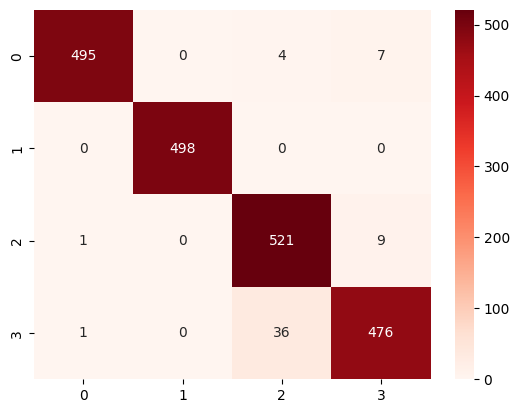

In [22]:
# Confusion Matrix
cm = confusion_matrix(ytest, al)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='Reds')

In [23]:
# Accuracy
accuracy = accuracy_score(ytest, al)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9717


In [84]:
# Classification Report
report = classification_report(ytest, al, target_names= [ 'Mild impairment', 'Moderate impairment','No impairment', 'Very mild impairment'])
print("Classification Report:\n", report)

Classification Report:
                       precision    recall  f1-score   support

     Mild impairment       1.00      0.98      0.99       506
 Moderate impairment       1.00      1.00      1.00       498
       No impairment       0.93      0.98      0.95       531
Very mild impairment       0.97      0.93      0.95       513

            accuracy                           0.97      2048
           macro avg       0.97      0.97      0.97      2048
        weighted avg       0.97      0.97      0.97      2048



In [86]:
#a= model.save("Alzheimer99.h5")